# Models.



In [ ]:
import pandas as pd
import numpy as np
import json
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import gc


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import datetime

In [ ]:
from psutil import virtual_memory
print(f'Working with {round(virtual_memory().total / 1e9,2)} gigas of RAM.')

Trabajando con 27.33 gigas de RAM.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/yelp/notebooks')

In [ ]:
# Read table for models
restaurants = pd.read_parquet(r'../data/restaurants/restaurants_data_models.parquet')

In [ ]:
restaurants.columns

Index(['metro_area', 'business_id', 'stars', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'Alcohol', 'DriveThru',
       'RestaurantsDelivery', 'RestaurantsPriceRange2', 'rew_count_2016',
       'vander_comp_mean', 'date_min', 'cat_value_mean', 'weekend_hours',
       'lab_day_hours'],
      dtype='object')

In [ ]:
# Assign category to the only column needed
restaurants['Alcohol'] = restaurants['Alcohol'].astype('category')
restaurants['RestaurantsPriceRange2'] = restaurants['RestaurantsPriceRange2'].astype('category')

In [ ]:
restaurants.columns

Index(['metro_area', 'business_id', 'stars', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'Alcohol', 'DriveThru',
       'RestaurantsDelivery', 'RestaurantsPriceRange2', 'rew_count_2016',
       'vander_comp_mean', 'date_min', 'cat_value_mean', 'weekend_hours',
       'lab_day_hours'],
      dtype='object')

In [ ]:
# Select the features for models.
restaurant_model=restaurants[['stars','Alcohol', 'DriveThru', 'RestaurantsDelivery', 'RestaurantsPriceRange2','rew_count_2016','vander_comp_mean','date_min',
 'cat_value_mean', 'weekend_hours', 'lab_day_hours']]

In [ ]:
restaurant_model.dtypes

stars                     category
Alcohol                   category
DriveThru                    int64
RestaurantsDelivery          int64
RestaurantsPriceRange2    category
rew_count_2016               int64
vander_comp_mean           float64
date_min                     int64
cat_value_mean             float64
weekend_hours                int64
lab_day_hours                int64
dtype: object

In [ ]:
# Generate the sat of characteristics and label.
X = restaurant_model.drop(['stars'],axis=1)
y = restaurant_model['stars']

In [ ]:
# Divided into train and test stratifying by label.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42, stratify = y)

In [ ]:
# Install a library for categorical variable management.
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 3.3 MB/s eta 0:00:00


In [ ]:
# Onehotencoder transformation for Alcohol.

list_columns_cat = ['Alcohol','RestaurantsPriceRange2']
list_other = list(set(restaurant_model.columns) - set(list_columns_cat))
one = ce.OneHotEncoder(cols=list_columns_cat)
model = one.fit(X_train, y_train)

In [ ]:
X_train_one = model.transform(X_train, y_train)
X_test_one = model.transform(X_test, y_test)
len(list(X_train_one.columns))

17

In [ ]:
X_train_one

,Alcohol_1,Alcohol_2,Alcohol_3,Alcohol_4,DriveThru,RestaurantsDelivery,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,RestaurantsPriceRange2_3,RestaurantsPriceRange2_4,RestaurantsPriceRange2_5,rew_count_2016,vander_comp_mean,date_min,cat_value_mean,weekend_hours,lab_day_hours
16890,1,0,0,0,0,0,1,0,0,0,0,11,0.907755,2016,49.818182,14,35
915,0,1,0,0,0,0,0,1,0,0,0,57,0.560495,2016,53.818182,26,55
17625,0,0,1,0,0,0,1,0,0,0,0,9,0.261233,2016,4.454545,24,56
971,1,0,0,0,0,1,0,1,0,0,0,27,0.287741,2016,3.636364,26,52
25771,0,1,0,0,0,0,0,1,0,0,0,120,0.819543,2016,9.363636,20,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28644,0,0,0,1,0,1,0,1,0,0,0,77,0.863705,2017,86.000000,20,18
20012,0,0,1,0,0,0,0,1,0,0,0,5,0.518020,2016,13.545455,0,45
8319,1,0,0,0,0,1,1,0,0,0,0,26,0.068188,2019,21.636364,0,0
4031,0,0,1,0,0,0,0,0,1,0,0,25,0.626612,2016,2.090909,14,35


In [ ]:
# Standardise all variables, mean 0, standard deviation 1.

scaler = StandardScaler()
model_scaled = scaler.fit(X_train_one)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_one), columns = X_train_one.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_one), columns = X_test_one.columns, index = X_test.index)

In [ ]:
#Transform Min Max with ranges 0-1, in order to be able to use Naive Bayes.
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler(feature_range=(0,1))
model_minmax = scaler_minmax.fit(X_train_one)
X_train_minmax = pd.DataFrame(scaler_minmax.transform(X_train_one), columns = X_train_one.columns, index = X_train.index)
X_test_minmax = pd.DataFrame(scaler_minmax.transform(X_test_one), columns = X_test_one.columns, index = X_test.index)

1) Naive Bayes:
It is a simple method we start by trying to apply this model to our data. It is generated very quickly and we get an accurancy of 0.62.
It classifies better the higher classes, having a lower accuracy in the negative class. 
The f-1, are not good, we start from a 0.5 for the negative class, up to a 0.72 in the positive class.
It serves as a base but we must try other models.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_minmax, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# predicts test type
predictions = clf.predict(X_test_minmax)

# Evaluate predictions
print(clf.score(X_test_minmax, y_test) * 100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, clf.predict(X_test_minmax)))

56.84870188003581
[[ 253  313   97]
 [ 229 1509 1115]
 [  43 1095 2048]]
              precision    recall  f1-score   support

    negativo       0.48      0.38      0.43       663
      neutro       0.52      0.53      0.52      2853
    positivo       0.63      0.64      0.64      3186

    accuracy                           0.57      6702
   macro avg       0.54      0.52      0.53      6702
weighted avg       0.57      0.57      0.57      6702



Logistic regression:

Applying logistic regression, we make a significant jump in accuracy. We raise the accuracy to 83 % and the F-1 to 83 %.
It is still better at predicting the higher classes, but quite balanced.


In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train_scaled , y_train )

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicts test
predictions = log_clf.predict(X_test_scaled)

# Evaluate predictions
print(log_clf.score(X_test_scaled, y_test) * 100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, log_clf.predict(X_test_scaled)))

83.00507311250374
[[ 478  184    1]
 [ 111 2262  480]
 [   0  363 2823]]
              precision    recall  f1-score   support

    negativo       0.81      0.72      0.76       663
      neutro       0.81      0.79      0.80      2853
    positivo       0.85      0.89      0.87      3186

    accuracy                           0.83      6702
   macro avg       0.82      0.80      0.81      6702
weighted avg       0.83      0.83      0.83      6702



Random Forrest:
We generated a Random Forrest model and tried to optimise the hyperparameters.

The results were similar to those of the logistic regression. The results could be described as good.

In [ ]:

RF = RandomForestClassifier()

# model is trained with the training dataset
RF.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# predicts test
predictions = RF.predict(X_test_scaled)

# Evaluate predictions
print(RF.score(X_test_scaled, y_test) * 100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, RF.predict(X_test_scaled)))

83.00507311250374
[[ 476  186    1]
 [ 119 2298  436]
 [   0  397 2789]]
              precision    recall  f1-score   support

    negativo       0.80      0.72      0.76       663
      neutro       0.80      0.81      0.80      2853
    positivo       0.86      0.88      0.87      3186

    accuracy                           0.83      6702
   macro avg       0.82      0.80      0.81      6702
weighted avg       0.83      0.83      0.83      6702



In [ ]:
RF = RandomForestClassifier()
### Parameter Tunning Optimization

param_grid = { 
    'n_estimators': [10,20,50,100,200,300], # poner tantos como se quiera probar
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,12,20],
    'criterion' :['gini', 'entropy']}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

CV = RandomizedSearchCV(RF, param_grid, cv=10, random_state=12345, n_jobs=2)
                  
CV.fit(X_train_one, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'n_estimators': 50, 'max_features': 'log2', 'max_depth': 12, 'criterion': 'gini'}
0.8322826607358582


In [ ]:

RF = RandomForestClassifier(n_estimators = 50, max_features= 'log2', max_depth = 12, criterion='gini')

# model is trained with the training dataset
RF.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=50)

In [ ]:
# predicts test
predictions = RF.predict(X_test_scaled )

# Evaluate predictions
print(RF.score(X_test_scaled, y_test) * 100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, RF.predict(X_test_scaled)))

82.99015219337511
[[ 466  196    1]
 [  97 2324  432]
 [   0  414 2772]]
              precision    recall  f1-score   support

    negativo       0.83      0.70      0.76       663
      neutro       0.79      0.81      0.80      2853
    positivo       0.86      0.87      0.87      3186

    accuracy                           0.83      6702
   macro avg       0.83      0.80      0.81      6702
weighted avg       0.83      0.83      0.83      6702



## XGBoost 
XGBoost works by building decision trees iteratively. At each iteration, a new tree is added to the existing set of trees and the tree weights are adjusted to minimise error. Trees are built sequentially, meaning that each tree is built using the results of previous trees. This allows XGBoost to capture complex patterns in the data that may be difficult to detect using a single tree.

One of the main advantages of XGBoost is its efficiency. It uses gradient boosting, allowing the algorithm to learn faster than other decision tree algorithms. 

We use Xgboost and perform hyperparameter optimisation, achieve 84% accuracy, and use this model as a definitive predictor of our restaurant classes. 
We apply undersampling to see if the results improve, if not, we discard it.



In [ ]:
from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier()
xgb1.fit(X_train_scaled, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
predictions = xgb1.predict(X_test_scaled )

# Evaluate predictions
print(xgb1.score(X_test_scaled, y_test) * 100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, xgb1.predict(X_test_scaled)))

83.07967770814683
[[ 491  171    1]
 [ 124 2280  449]
 [   0  389 2797]]
              precision    recall  f1-score   support

    negativo       0.80      0.74      0.77       663
      neutro       0.80      0.80      0.80      2853
    positivo       0.86      0.88      0.87      3186

    accuracy                           0.83      6702
   macro avg       0.82      0.81      0.81      6702
weighted avg       0.83      0.83      0.83      6702



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_test1 = params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

gsearch1 = RandomizedSearchCV(xgb1,param_distributions=param_test1,n_iter=25,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
gsearch1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [ ]:

print(gsearch1.best_params_)    
print(gsearch1.best_score_)

{'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}
0.8353785587692789


In [ ]:
params=gsearch1.best_params_

from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(**params)
xgb1.fit(X_train_scaled, y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4,
              objective='multi:softprob')

In [ ]:
predictions = xgb1.predict(X_test_scaled )

# Evaluate predictions
print(xgb1.score(X_test_scaled, y_test) * 100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, xgb1.predict(X_test_scaled)))

83.09459862727545
[[ 494  168    1]
 [ 116 2275  462]
 [   0  386 2800]]
              precision    recall  f1-score   support

    negativo       0.81      0.75      0.78       663
      neutro       0.80      0.80      0.80      2853
    positivo       0.86      0.88      0.87      3186

    accuracy                           0.83      6702
   macro avg       0.82      0.81      0.82      6702
weighted avg       0.83      0.83      0.83      6702



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

In [ ]:
xgb1.fit(X_resampled, y_resampled )

XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4,
              objective='multi:softprob')

In [ ]:
predictions = xgb1.predict(X_test_scaled )

# Evaluate predictions
print(xgb1.score(X_test_scaled, y_test) * 100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, xgb1.predict(X_test_scaled)))

80.90122351536854
[[ 610   52    1]
 [ 368 2053  432]
 [   2  425 2759]]
              precision    recall  f1-score   support

    negativo       0.62      0.92      0.74       663
      neutro       0.81      0.72      0.76      2853
    positivo       0.86      0.87      0.87      3186

    accuracy                           0.81      6702
   macro avg       0.77      0.84      0.79      6702
weighted avg       0.82      0.81      0.81      6702



In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

### Importance of features:

The anailis of sentiment of the reviews, the offer well explained and defined by the categories with which the restaurant is presented on yelp, and the number of reviews, are the characteristics that contribute most to discriminate the level of stars a customer gives a restaurant.

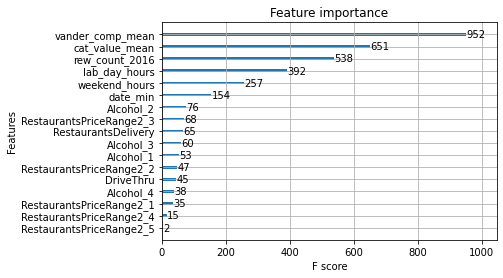

In [ ]:
plot_importance(xgb1)
pyplot.show()

## Interpretability: SHAP.
SHAP is based on Shapley's theorem, which is used in game theory to measure the value of a player in a cooperative game. In the context of Machine Learning, SHAP uses Shapley's theorem to calculate the "value" of each feature in a model, i.e. how much each feature contributes to the model's predictions. It does this through the use of gradient boosting.


In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.9 MB/s eta 0:00:00


In [ ]:
import shap
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X_test_scaled)

In this graph we can see for each of the classes which characteristics contribute most to the prediction. It serves as a first approximation, but the individual class graphs will be more interesting.

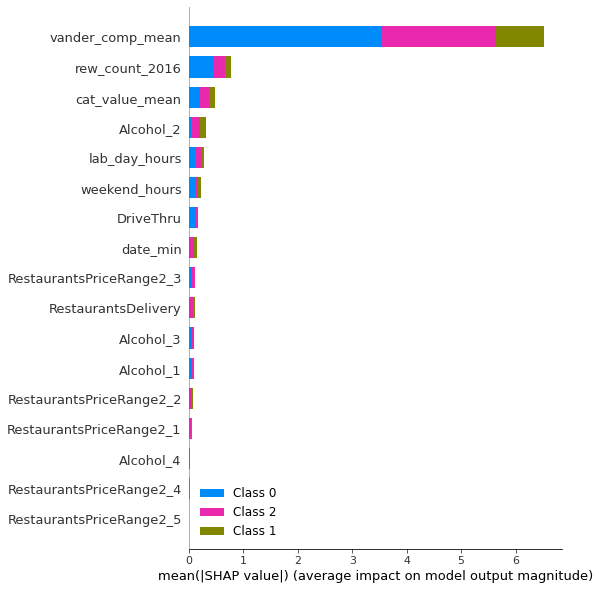

In [ ]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

### Class 0: Negative
It is observed that negative sentiment analyses, and low values in their presentation to customers, contribute to the prediction in this category. Conversely, high sentiment analyses will lead to higher categories. Note that restaurants with DriveThru and long opening hours tend to be predicted in this negative class.

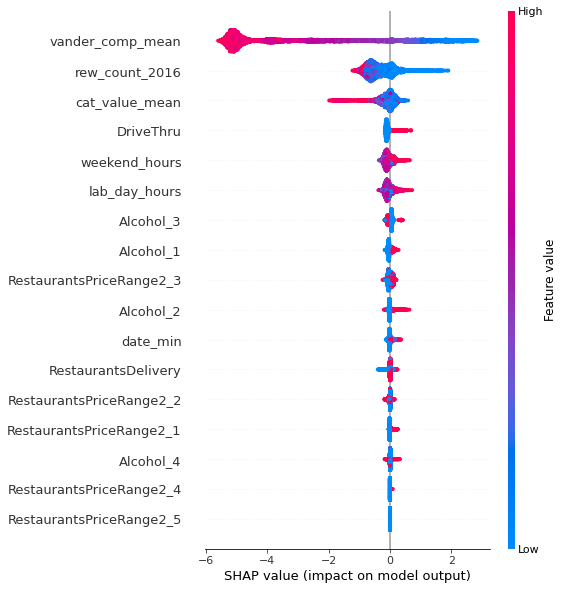

In [ ]:
shap.summary_plot(shap_values[0], X_test_scaled, plot_type="dot")

### Category 1: Neutro.

Reviews with mixed negative and positive feelings seem to determine membership in this class. A very clear mix of colours is observed on the far right of the columan vader. It seems that Alcohol_2 discriminates membership in this class and the presence of low numbers of reviews also tends to classify in this category.

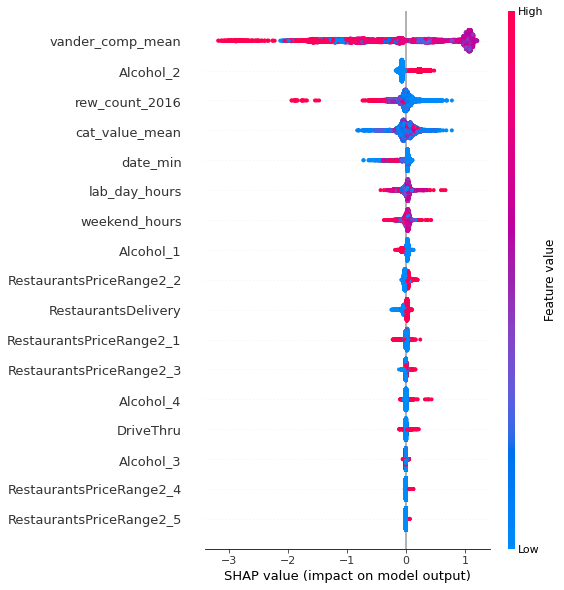

In [ ]:
shap.summary_plot(shap_values[1], X_test_scaled, plot_type="dot")

### Class 3: Positive.
When the sentiment analysis of reviews is positive, opening hours are not too high, and the business is presented in well-defined categories, restaurants score well.

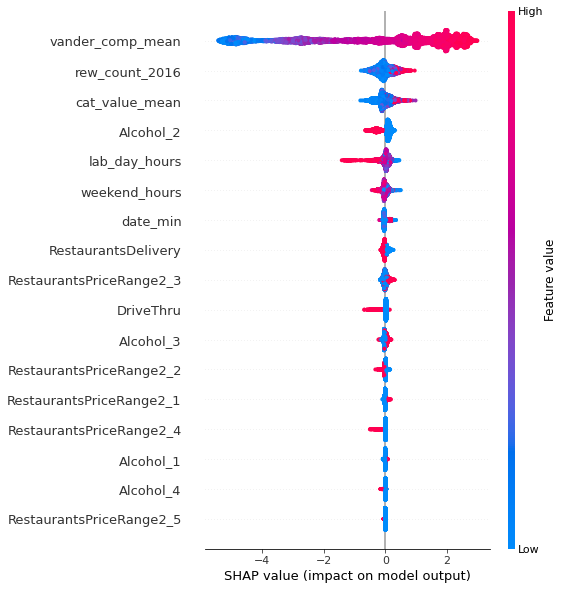

In [ ]:
shap.summary_plot(shap_values[2], X_test_scaled, plot_type="dot")

## Conclusion.

In order to improve their businesses' ratings, restaurant managers should be concerned with:

* Improve their presentation to the customer: A simple way to do this could be to complement the cards with which they are presented. As long as they respond to the reality of their offer. It has been shown that restaurants with very vague categories tend to be predicted as low class or neutral.

* Encourage your customers to give their opinion on yelp: Restaurants with few reviews tend to belong to the negative categories. 

* Another basic but more complex one: It is essential to generate positive feelings among customers. Encourage a service culture that encourages customers to give their opinions.